## Extraction of BG from a video through median filter.
Here applied to a single frame (img_path)

In [3]:
# Imports
import sys, os
import cv2 as cv
import matplotlib.pyplot as plt
# setting path
sys.path.append('../Preprocessing')
sys.path.append('../ForegroundRemoval/MedianFilter')
sys.path.append('../VideoManagment')
from preproc import beautify_frame
from median_image import median_filter

Images successfully loaded


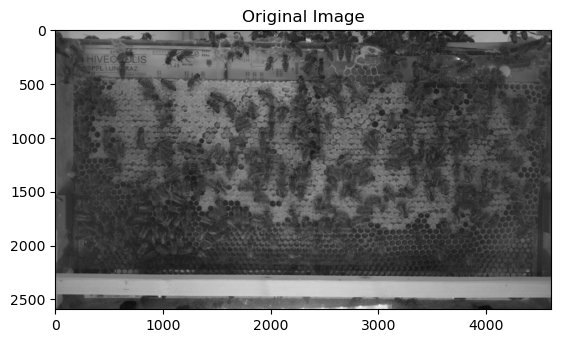

Images successfully preprocessed


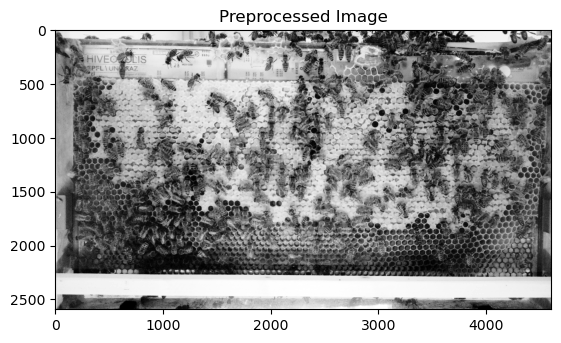

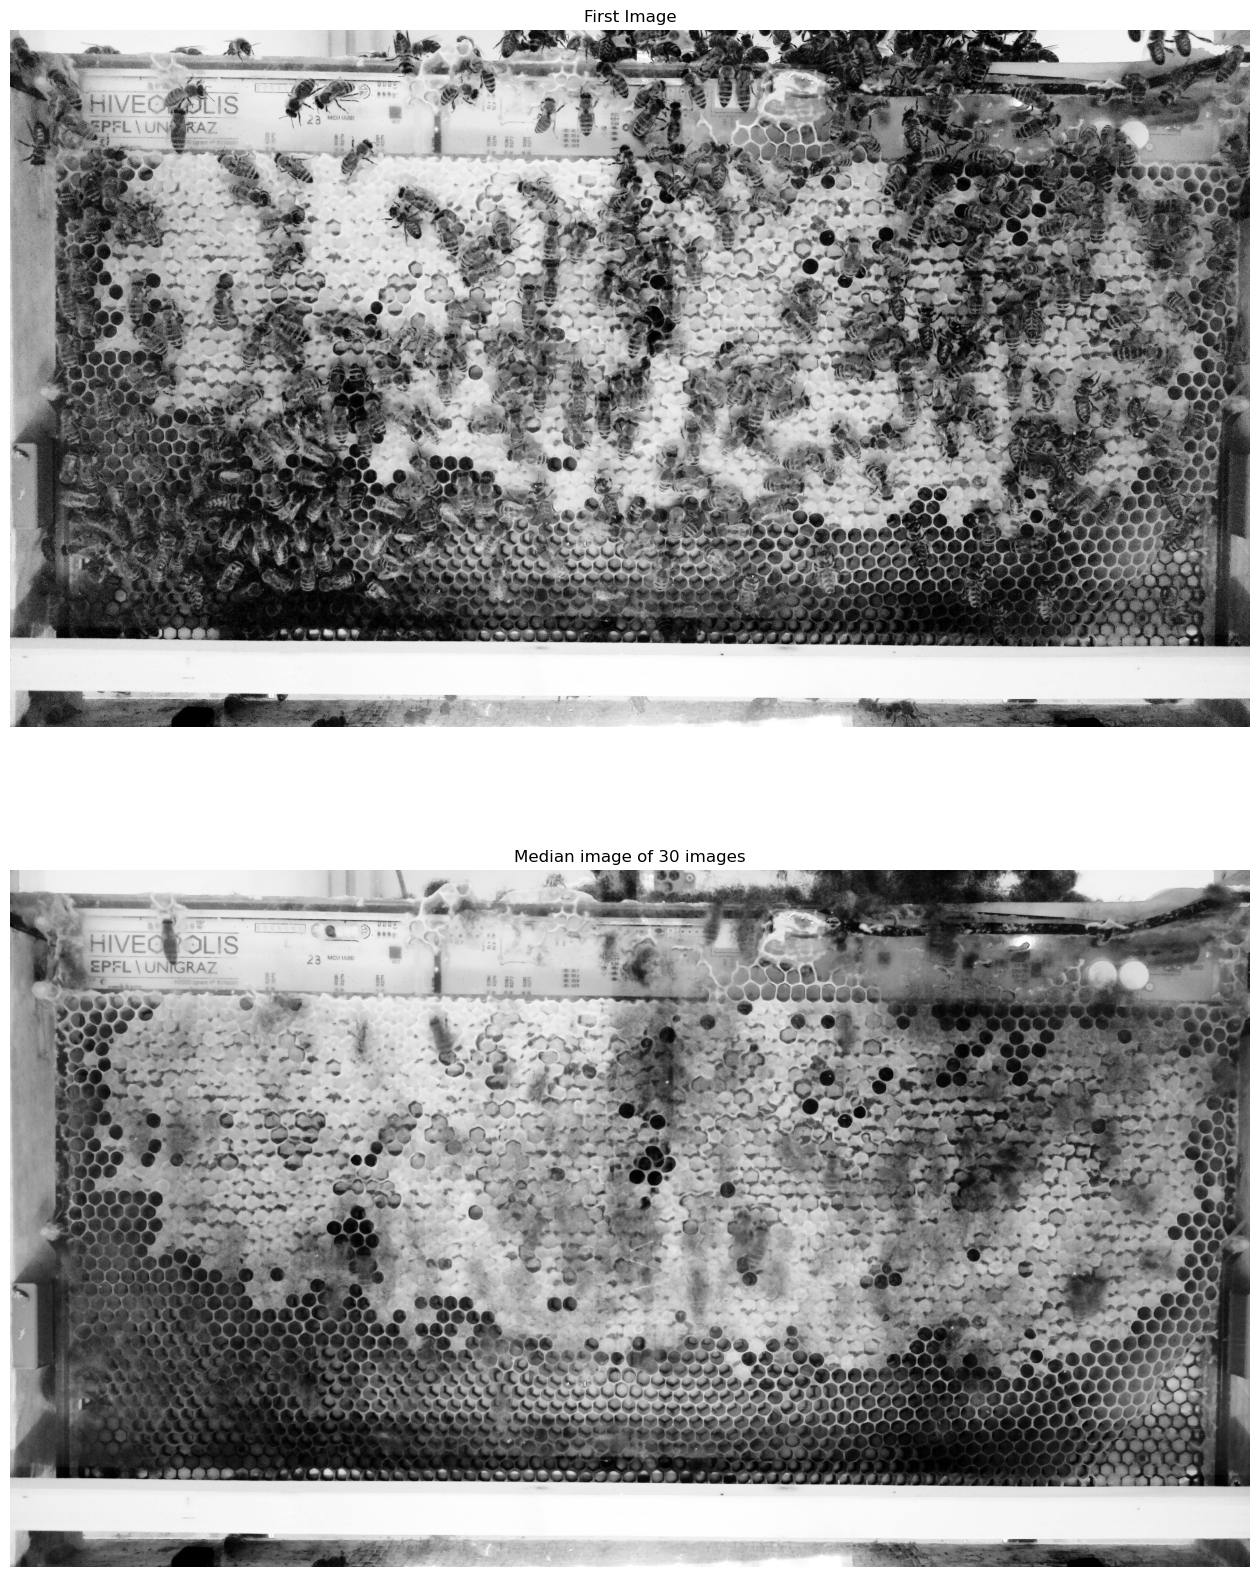

In [4]:
START_INDEX = 6000 # The index of the first image to use
NUMB_IMAGES = 30 # Number of images to use for foreground removal

img_path = '/Users/cyrilmonette/Desktop/EPFL 2018-2026/PhD - Mobots/data/24.09_observation_OH/Images/h1r2_1minute/' # This is a folder with thousands of images. Edit to your path
# Get the list of images
files = os.listdir(img_path)
files.sort()
files = files[START_INDEX:START_INDEX+NUMB_IMAGES]
images = [cv.imread(img_path+file, cv.IMREAD_GRAYSCALE) for file in files]
print("Images successfully loaded")

# show the first image
plt.imshow(images[0], cmap='gray')
plt.title('Original Image')
plt.show()

# Preprocess the image
images = [beautify_frame(img) for img in images]
print("Images successfully preprocessed")

# show the first image
plt.imshow(images[0], cmap='gray')
plt.title('Preprocessed Image')
plt.show()

# Median filter the images
median_image = median_filter(images)

# Create a subplot
plt.figure(figsize=(16, 20))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.imshow(images[0], cmap='gray')
plt.title('First Image')
plt.axis('off')

plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.imshow(median_image, cmap='gray')
plt.title('Median image of %d images' % NUMB_IMAGES)
plt.axis('off')

# Save the last plot
plt.savefig(f'median_filter_n{NUMB_IMAGES}.png')
